In [87]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd
from datetime import datetime, timedelta

import seaborn as sns

from matplotlib import rcParams
from sklearn.linear_model import LinearRegression

from collections import Counter

sns.set(rc={'figure.figsize': (11.7, 8.27)})
rcParams['figure.figsize'] = 11.7,8.27
plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
xlsx = pd.read_excel('datas.xlsx', 
                    header = None, 
                    skiprows = 2,
                    engine = 'openpyxl')

data_startcol = 7
ogDatasObj = {}
for col in xlsx:
    if col >= data_startcol: # startcol 7
        ogDatasObj[f'{xlsx[col][0]}-{xlsx[col][1]}-{xlsx[col][2]}'] = xlsx[col][3:]

ogDatas = pd.DataFrame(ogDatasObj)
ogDatas = ogDatas.fillna(0)
ogDatas = ogDatas.reset_index()
del ogDatas['index']

pd.set_option('display.max_row', 20)
pd.set_option('display.max_columns', 100)

ogDatas

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,아파트1-103-502,아파트1-103-1602,아파트1-103-301,아파트1-103-1502,아파트1-103-202,아파트1-102-903,아파트1-102-603,아파트1-102-203,아파트1-102-704,아파트1-102-703,아파트1-102-403,아파트1-102-303,아파트1-101-604,아파트1-101-1602,아파트1-101-1002,아파트1-101-1202,아파트1-101-1604,아파트1-101-402,아파트1-101-303,아파트1-101-502,아파트1-101-1403,아파트1-101-904,아파트1-101-1502,아파트1-101-1102,아파트1-101-901,아파트1-101-704,아파트1-101-504,아파트1-102-104,아파트1-102-301,아파트1-102-1501,아파트1-102-1602,아파트1-102-1002,아파트1-102-401,아파트1-102-802,아파트1-102-801,아파트1-103-505,아파트1-103-1805,아파트1-103-1306,아파트1-103-1806,아파트1-103-803,...,아파트4-103-609,아파트4-103-707,아파트4-103-101,아파트4-102-803,아파트4-101-1501,아파트4-103-404,아파트4-103-909,아파트4-101-1203,아파트4-103-806,아파트4-103-1410,아파트4-103-402,아파트4-103-703,아파트4-103-106,아파트4-103-910,아파트4-102-402,아파트4-103-907,아파트4-103-1406,아파트4-103-1006,아파트4-103-608,아파트4-103-403,아파트4-105-1102,아파트4-103-804,아파트4-103-103,아파트4-103-706,아파트4-104-1001,아파트4-105-103,아파트4-102-401,아파트4-103-1104,아파트4-103-906,아파트4-103-606,아파트4-103-1307,아파트4-103-410,아파트4-103-1309,아파트4-102-102,아파트4-103-508,아파트4-105-1104,아파트4-102-1402,아파트4-103-407,아파트4-103-1206,아파트4-103-108,아파트4-105-102,아파트4-103-1102,아파트4-105-601,아파트4-104-1501,아파트4-103-702,아파트4-102-104,아파트4-103-902,아파트4-101-602,아파트4-103-905,아파트4-101-104
0,0.085,0.016,0.052,0.003,0.032,0.074,0.053,0.096,0.105,0.042,0.149,0.039,0.054,0.132,0.091,0.169,0.051,0.118,0.060,0.047,0.047,0.053,0.046,0.104,0.079,0.092,0.043,0.069,0.139,0.026,0.146,0.092,0.025,0.127,0.045,0.042,0.113,0.207,0.030,0.171,0.045,0.064,0.045,0.277,0.186,0.142,0.132,0.034,0.088,0.041,...,0.041,0.137,0.114,0.046,0.098,0.058,0.068,0.040,0.063,0.048,0.168,0.053,0.099,0.075,0.080,0.158,0.024,0.153,0.056,0.037,0.091,0.069,0.128,0.092,0.072,0.069,0.034,0.166,0.086,0.113,0.184,0.175,0.096,0.054,0.080,0.084,0.119,0.088,0.117,0.161,0.182,0.044,0.051,0.057,0.126,0.094,0.065,0.116,0.093,0.147
1,0.086,0.049,0.053,0.002,0.022,0.014,0.048,0.090,0.108,0.022,0.119,0.023,0.075,0.142,0.063,0.183,0.045,0.164,0.065,0.066,0.043,0.056,0.045,0.130,0.081,0.102,0.042,0.083,0.176,0.046,0.113,0.088,0.026,0.116,0.066,0.050,0.139,0.188,0.031,0.165,0.032,0.068,0.052,0.244,0.209,0.205,0.161,0.039,0.094,0.036,...,0.036,0.083,0.124,0.055,0.115,0.068,0.072,0.032,0.085,0.111,0.173,0.050,0.103,0.068,0.076,0.360,0.031,0.132,0.038,0.037,0.097,0.075,0.123,0.072,0.053,0.059,0.023,0.135,0.143,0.112,0.101,0.163,0.154,0.078,0.036,0.076,0.092,0.042,0.121,0.179,0.117,0.060,0.036,0.055,0.116,0.089,0.083,0.113,0.105,0.130
2,0.085,0.013,0.073,0.002,0.016,0.051,0.029,0.033,0.097,0.046,0.116,0.018,0.071,0.096,0.159,0.122,0.043,0.141,0.097,0.064,0.055,0.054,0.051,0.119,0.109,0.097,0.056,0.086,0.126,0.036,0.113,0.079,0.027,0.170,0.072,0.044,0.163,0.201,0.053,0.163,0.041,0.071,0.046,0.256,0.173,0.199,0.122,0.028,0.084,0.026,...,0.045,0.081,0.115,0.063,0.070,0.053,0.078,0.036,0.083,0.111,0.084,0.053,0.084,0.071,0.087,0.471,0.024,0.079,0.047,0.036,0.078,0.059,0.137,0.084,0.083,0.056,0.036,0.106,0.160,0.108,0.184,0.162,0.124,0.135,0.053,0.073,0.108,0.056,0.100,0.224,0.147,0.053,0.075,0.032,0.131,0.055,0.084,0.153,0.119,0.104
3,0.085,0.043,0.067,0.002,0.015,0.015,0.031,0.092,0.048,0.067,0.102,0.031,0.128,0.082,0.104,0.141,0.031,0.103,0.075,0.082,0.046,0.016,0.046,0.078,0.070,0.073,0.051,0.085,0.098,0.048,0.145,0.078,0.021,0.142,0.062,0.034,0.149,0.194,0.038,0.065,0.043,0.070,0.043,0.274,0.047,0.108,0.162,0.034,0.069,0.038,...,0.039,0.086,0.068,0.035,0.064,0.061,0.065,0.022,0.066,0.087,0.080,0.047,0.079,0.066,0.029,0.187,0.030,0.059,0.055,0.035,0.080,0.074,0.090,0.066,0.071,0.062,0.034,0.114,0.121,0.108,0.051,0.170,0.068,0.072,0.074,0.078,0.101,0.080,0.084,0.178,0.152,0.047,0.064,0.022,0.104,0.057,0.087,0.149,0.102,0.093
4,0.084,0.033,0.051,0.003,0.022,0.052,0.052,0.030,0.041,0.045,0.102,0.032,0.122,0.069,0.089,0.103,0.011,0.094,0.084,0.053,0.047,0.022,0.048,0.040,0.077,0.089,0.041,0.092,0.062,0.045,0.109,0.109,0.033,0.084,0.069,0.035,0.225,0.199,0.078,

In [81]:
startDate = datetime(2018,5,1)
endDate = datetime(2019,5,1)
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta
dateIndexArr = [dt.strftime('%Y%m%d') for dt in
                   datetime_range(startDate, endDate, timedelta(days = 1))]

searchKeyword = '아파트1-104-1206'
tsDatasObj = {}
startIdx = 0;
endIdx = 96;
for date in dateIndexArr:
    tsDatasObj[date] = ogDatas[searchKeyword][startIdx:endIdx].values.tolist()
    startIdx = endIdx
    endIdx = endIdx + 96

tsDatas = pd.DataFrame(tsDatasObj)
tsDatas = tsDatas.T
tsDatas = tsDatas.reset_index()
tsDatas.rename(columns={'index':'date'}, inplace=True)
tsDatas['year'] = [dt[0:4] for dt in tsDatas['date']]
tsDatas['month'] = [dt[4:6] for dt in tsDatas['date']]
tsDatas['day'] = [dt[6:8] for dt in tsDatas['date']]
tsDatas['date'] = [datetime.strptime(dt, "%Y%m%d") for dt in tsDatas['date']]
tsDatas.reindex(columns=['date', 'year', 'month', 'day'])

,date,year,month,day
0,2018-05-01,2018,05,01
1,2018-05-02,2018,05,02
2,2018-05-03,2018,05,03
3,2018-05-04,2018,05,04
4,2018-05-05,2018,05,05
...,...,...,...,...
360,2019-04-26,2019,04,26
361,2019-04-27,2019,04,27
362,2019-04-28,2019,04,28
363,2019-04-29,2019,04,29


In [86]:
DAYS = {
    "월" : 0,
    "화" : 1,
    "수" : 2,
    "목" : 3,
    "금" : 4,
    "토" : 5,
    "일" : 6
}

SEASONS = {
    "봄" : ["03", "04", "05"],
    "여름" : ["06", "07", "08"],
    "가을" : ["09", "10", "11"],
    "겨울" : ["12", "01", "02"]
}

SEASONS = {
    "03": "봄",
    "04": "봄",
    "05": "봄",
}

ALLDATAS = False
DAY = "월"
SEASON = "여름"
# ALLDATAS is tsDatas
if ALLDATAS:
    datas = tsDatas
else :    
    datas = tsDatas[(tsDatas['month'].isin(SEASONS[SEASON]))
            & (tsDatas['date'].dt.weekday == DAYS[DAY]) ]
datas

SyntaxError: invalid syntax (<ipython-input-86-857e21fdd699>, line 19)

In [61]:
dpp = datas[datas.columns.difference(['date', 'year', 'month', 'day'])].copy()
dpp = dpp

# Scaler 선택
# STD, MIN, MAX, ROBUST
selScaler = "STD"

scaler = StandardScaler()
if selScaler == "STD":
    scaler = StandardScaler()
elif selScaler == "MIN":
    scaler = MinMaxScaler()
elif selScaler == "MAX":
    scaler = MaxAbsScaler()
elif selScaler == "ROBUST":
    scaler = RobustScaler()

dpp = pd.DataFrame(scaler.fit_transform(dpp))

dpp.index = datas['date']
dpp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-06-04,-0.625414,-0.627900,-0.702278,-0.744639,-0.834411,-0.779608,-0.795757,-0.736613,-0.807356,-0.675358,-0.566691,-0.482020,-0.542282,-0.579319,-0.628027,-0.571022,-0.571273,-0.488586,-0.491021,-0.501966,-0.438445,-0.490659,-0.483288,-0.420600,-0.423392,-0.395210,-0.627362,-0.619411,-0.627697,-0.227118,-0.682859,-0.918872,-0.650502,-0.388171,-0.279717,-0.478023,-0.369976,-0.281314,-0.311405,-0.441830,-0.311882,-0.306036,-0.316095,-0.539918,-0.585746,-0.281420,-0.281450,-0.422944,-0.391330,-0.555230,-0.607370,-0.441771,-0.863636,-0.777778,-0.110883,-0.661724,-0.819878,0.315122,-0.748331,-0.077152,0.269186,-0.721995,-0.426401,-0.155946,0.206393,-0.174891,-0.579751,0.336788,-0.490466,-0.011947,-0.495682,0.133582,-1.461265,-0.210386,0.704694,1.490912,-0.210064,-0.082001,0.457613,-0.125546,0.985826,-0.064605,-0.079613,1.204985,1.743453,0.023863,0.024741,0.106638,0.146265,0.277592,1.177125,2.041906,-0.069323,-0.183331,-0.336315,-0.497272
2018-06-11,-0.306006,-0.229719,-0.315262,-0.361907,-0.386174,-0.307262,-0.329682,-0.257815,-0.322784,-0.203126,-0.039694,-0.372782,-0.433977,-0.479436,-0.524942,-0.472045,-0.466230,-0.347124,-0.398954,-0.353658,-0.227342,-0.333441,-0.507546,-0.292549,-0.349012,-0.305747,-0.382078,-0.549564,-0.590521,-0.627140,-0.608261,-0.674322,-0.670122,-0.400978,-0.292387,-0.552894,-0.770783,-0.281314,-0.311405,-0.415115,-0.324094,-0.306036,-0.335851,-0.680296,-0.741148,-0.281420,-0.427804,-0.422944,-0.627948,-1.211411,-0.950666,-0.963863,-0.863636,-0.777778,-0.591377,-1.167748,-0.819878,0.059085,-0.748331,-0.077152,0.085006,-0.721995,-0.079950,-2.588699,-2.774835,-0.174891,-0.237171,0.024056,-0.200645,-3.273524,-1.462261,0.133582,0.841334,1.309069,1.722586,-2.957383,-0.308769,-0.345042,-0.581096,-0.476062,-1.062050,-0.477875,-0.453699,-0.889241,-0.208547,-0.119316,-0.266256,-0.204306,-0.189284,-0.155452,0.180070,0.696318,-0.161754,-0.421661,-0.503339,-0.497272
2018-06-18,-0.664130,-0.598036,-0.682431,-0.707299,-0.754725,-0.687193,-0.704568,-0.642935,-0.704255,-0.588621,-0.456900,-0.392644,-0.443823,-0.489424,-0.524942,-0.481943,-0.466230,-0.347124,-0.388725,-0.396031,-0.306505,-0.389590,-0.362000,-0.343769,-0.373805,-0.331308,-0.382078,-0.569520,-0.599815,-0.636664,-0.649704,-0.853031,-0.572019,-0.285709,-0.178356,0.195817,0.832446,-0.220022,-0.261580,-0.388400,-0.275245,-0.268738,-0.256827,-0.118782,-0.119540,-0.083665,0.011258,-0.079302,-0.273021,0.429041,0.422518,0.602414,0.909091,1.388889,0.850104,0.350325,0.364390,1.083231,0.641427,1.427306,0.637545,1.289277,0.612952,0.654972,0.653577,0.474703,0.447989,0.962250,0.668817,0.298679,0.470898,0.877824,0.265684,0.701287,0.365397,0.219971,-0.275867,-0.372731,-0.533882,-0.421294,0.919766,-0.011280,0.032613,0.911794,1.580787,-0.059658,-0.143731,-0.048834,-0.077434,-0.043181,0.396821,0.879808,-0.323509,-0.409745,-0.522988,-0.497272
2018-06-25,-0.586698,-0.607991,-0.702278,-0.716634,-0.774646,-0.707729,-0.714700,-0.663752,-0.724876,-0.617534,-0.500817,-0.422436,-0.483207,-0.519389,-0.555867,-0.521533,-0.497743,-0.347124,-0.368265,-0.374844,-0.491220,-0.378360,-0.374129,-0.356575,-0.398598,-0.369649,-0.406606,-0.599454,-0.627697,-0.665237,-0.666281,-0.570858,-0.650502,-0.413786,-0.292387,-0.552894,-1.171590,-0.281314,-0.311405,-0.441830,-0.311882,-0.318469,-0.335851,-0.680296,-0.741148,-0.380297,-0.574158,-0.537492,-0.627948,-0.883320,-1.293962,-0.963863,-0.863636,-1.500000,-0.591377,-1.167748,-0.819878,0.059085,-0.748331,-0.578638,0.269186,-1.392419,-0.079950,-0.561405,0.206393,-0.499688,-0.237171,0.024056,0.668817,0.919932,1.759670,-2.347226,1.416984,0.397396,-0.313197,-0.097765,-0.34167

In [62]:
pca = PCA(n_components=2)

pca.fit(dpp)
dr = pd.DataFrame(pca.transform(dpp), columns = ['x','y'])

dr.index = datas['date']
dr

,x,y
date,,
2018-06-04,-3.567929,0.712678
2018-06-11,-2.595719,-2.046060
2018-06-18,-1.372388,2.996266
2018-06-25,-4.444298,-2.272860
2018-07-02,-1.312734,6.821250
2018-07-09,-1.705622,-1.269252
2018-07-16,-1.596875,1.973707
2018-07-23,5.601343,8.413433
2018-07-30,-2.466706,-3.596776


<AxesSubplot:xlabel='x', ylabel='y'>

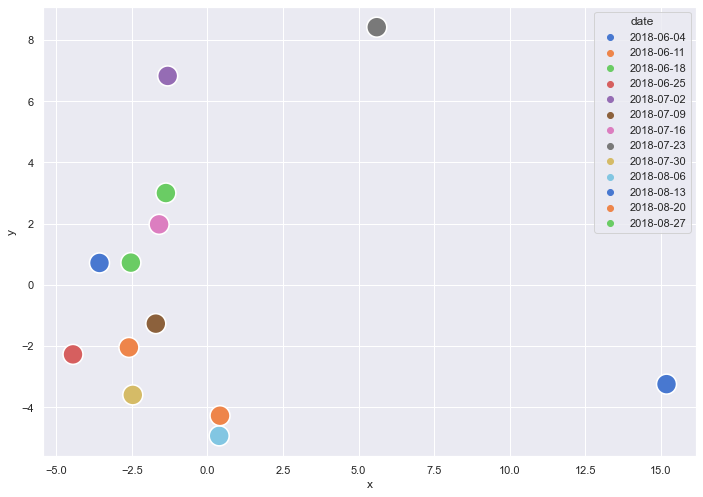

In [63]:
scatterDatas = dr.copy()
scatterDatas.reset_index(inplace=True)


date = [d.strftime('%Y-%m-%d') for d in scatterDatas['date']]
scatterDatas['date'] = date

sns.scatterplot(x='x', y="y", 
                palette="muted",
                hue="date",
                s=400,
                data=scatterDatas)

<AxesSubplot:xlabel='x', ylabel='y'>

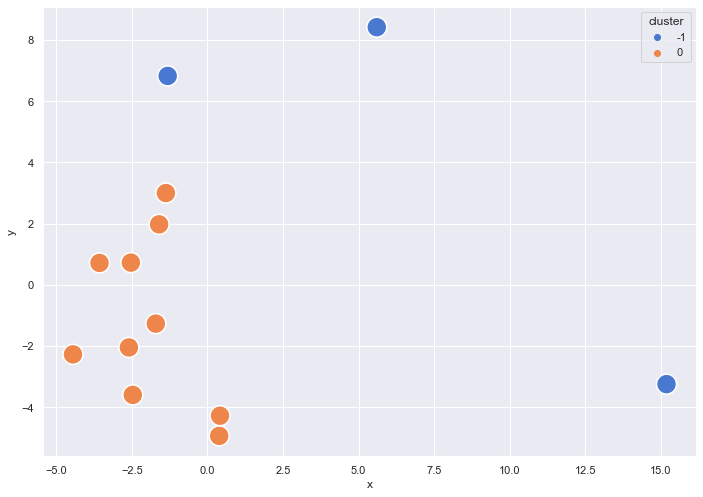

In [64]:
clustering = dr.copy()

result = DBSCAN(eps=3, min_samples=2).fit(dr)
clustering['cluster'] = result.labels_

sns.scatterplot(x='x', y="y", 
                hue="cluster",
                palette="muted",
                s=400,
                data=clustering)

<AxesSubplot:>

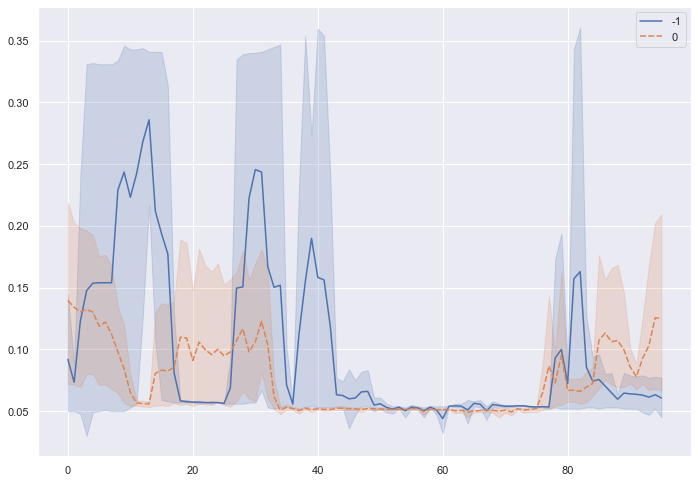

In [65]:
tsCheck = datas[datas.columns.difference(['year', 'month', 'day'])]
tsCheck.reset_index(inplace=True)
del tsCheck['index']
tsCheck = tsCheck.set_index('date')
tsCheck['cluster'] = clustering['cluster']
tsCheck.reset_index(inplace=True)
tsCheck.set_index(['cluster', 'date'], inplace=True)
tsCheck = tsCheck.T
tsCheck
sns.lineplot(data=tsCheck)

In [66]:
'''
Data Structure
{
    date: datetime,
    timeslot: integer,
    cluster: string,
    data: float
}
'''
processingData = [];
for d in tsCheck:
    for idx,t in enumerate(tsCheck[d]):
        processingData.append({
            "date": d[1],
            "timeslot": idx,
            "cluster": f"cluster-{d[0]}",
            "data": t
        })
processingData = pd.DataFrame(processingData)
processingData

,date,timeslot,cluster,data
0,2018-06-04,0,cluster-0,0.064
1,2018-06-04,1,cluster-0,0.057
2,2018-06-04,2,cluster-0,0.058
3,2018-06-04,3,cluster-0,0.056
4,2018-06-04,4,cluster-0,0.052
...,...,...,...,...
1243,2018-08-27,91,cluster-0,0.071
1244,2018-08-27,92,cluster-0,0.081
1245,2018-08-27,93,cluster-0,0.079
1246,2018-08-27,94,cluster-0,0.073


<AxesSubplot:xlabel='timeslot', ylabel='data'>

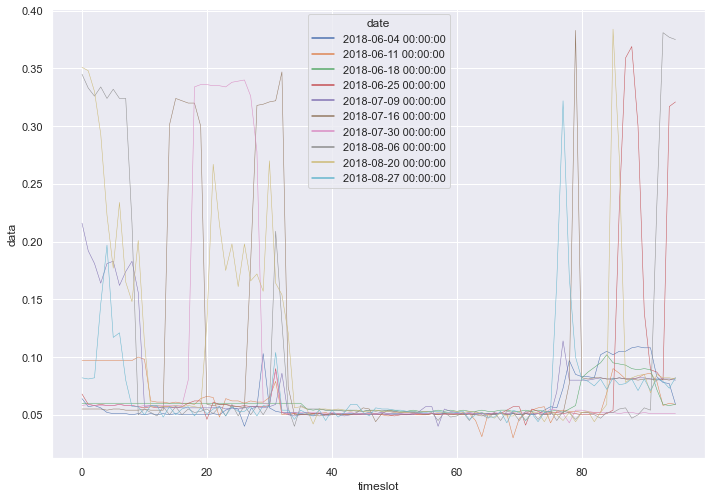

In [67]:
sns.lineplot(data=processingData[processingData['cluster'] == 'cluster-0'],
            x="timeslot",
            y="data",
            units="date",
            hue="date",
            estimator=None,
            lw=0.5)

<AxesSubplot:>

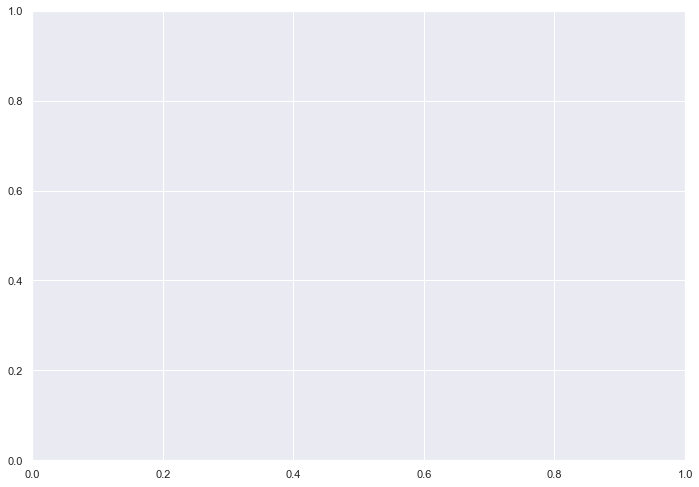

In [68]:
sns.lineplot(data=processingData[processingData['cluster'] == 'cluster-1'],
            x="timeslot",
            y="data",
            units="date",
            hue="date",
            estimator=None,
            lw=0.5)

<AxesSubplot:xlabel='timeslot', ylabel='data'>

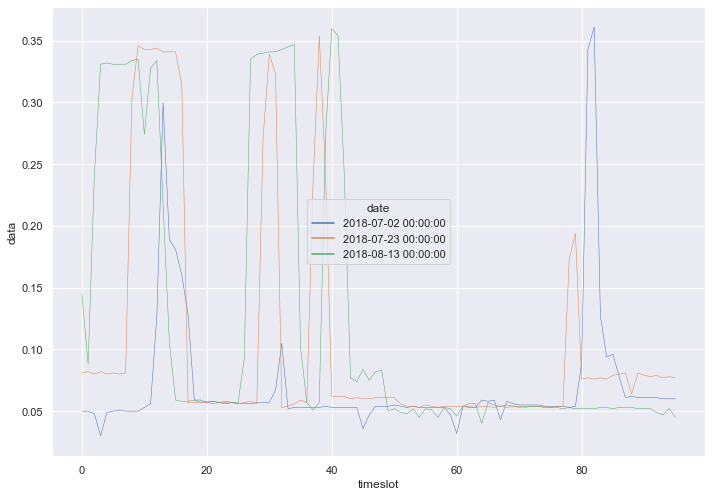

In [69]:
sns.lineplot(data=processingData[processingData['cluster'] == 'cluster--1'],
            x="timeslot",
            y="data",
            units="date",
            hue="date",
            estimator=None,
            lw=0.5)

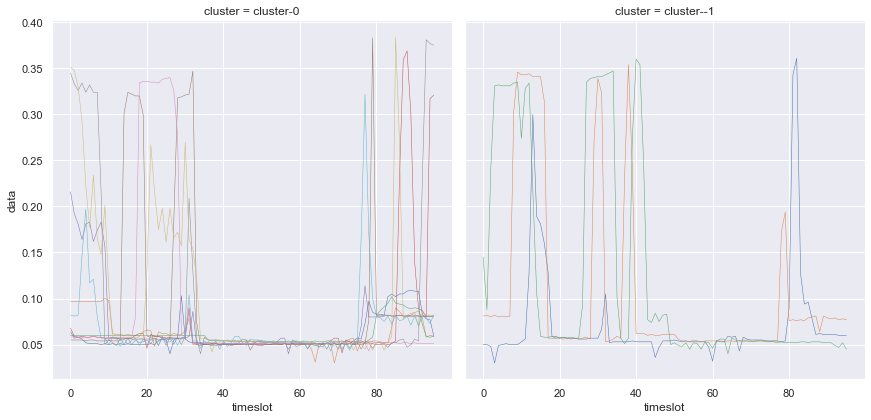

In [70]:
clusterMap = sns.FacetGrid(processingData, col="cluster",col_wrap=3, height=6)
clusterMap.map(sns.lineplot, "timeslot", "data", "date",estimator=None, lw=0.5)

In [85]:
seasonTest = tsDatas.copy()

seasonTest['SEASON'] = 'ALL'
seasonTest[(seasonTest['month'].isin(SEASONS['봄']))]['SEASON'] = '봄'
seasonTest[(seasonTest['month'].isin(SEASONS['여름']))]['SEASON'] = '여름'
seasonTest[(seasonTest['month'].isin(SEASONS['가을']))]['SEASON'] = '가을'
seasonTest[(seasonTest['month'].isin(SEASONS['겨울']))]['SEASON'] = '겨울'
seasonTest[(seasonTest['month'].isin(SEASONS['겨울']))]['SEASON']

<ipython-input-85-ac6766ad336b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonTest[(seasonTest['month'].isin(SEASONS['봄']))]['SEASON'] = '봄'
<ipython-input-85-ac6766ad336b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonTest[(seasonTest['month'].isin(SEASONS['여름']))]['SEASON'] = '여름'
<ipython-input-85-ac6766ad336b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

214    ALL
215    ALL
216    ALL
217    ALL
218    ALL
      ... 
299    ALL
300    ALL
301    ALL
302    ALL
303    ALL
Name: SEASON, Length: 90, dtype: object

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn = KNeighborsClassifier(n_neighbors=1, weights="distance", metric="euclidean")
data = [dr['x'].values.tolist()
Y = dr['y'].values.tolist()
knn.fit(dr,[0,1,2])

ValueError: Found input variables with inconsistent numbers of samples: [13, 3]